In [36]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

# Multivariate Linear Regression

### Get the Data and Data Preprocessing

In [37]:
df=pd.read_csv('/content/data.csv')

In [38]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [39]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


we can see that the dataset has no null values

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**Visulalizing relation between target variable and response variables**

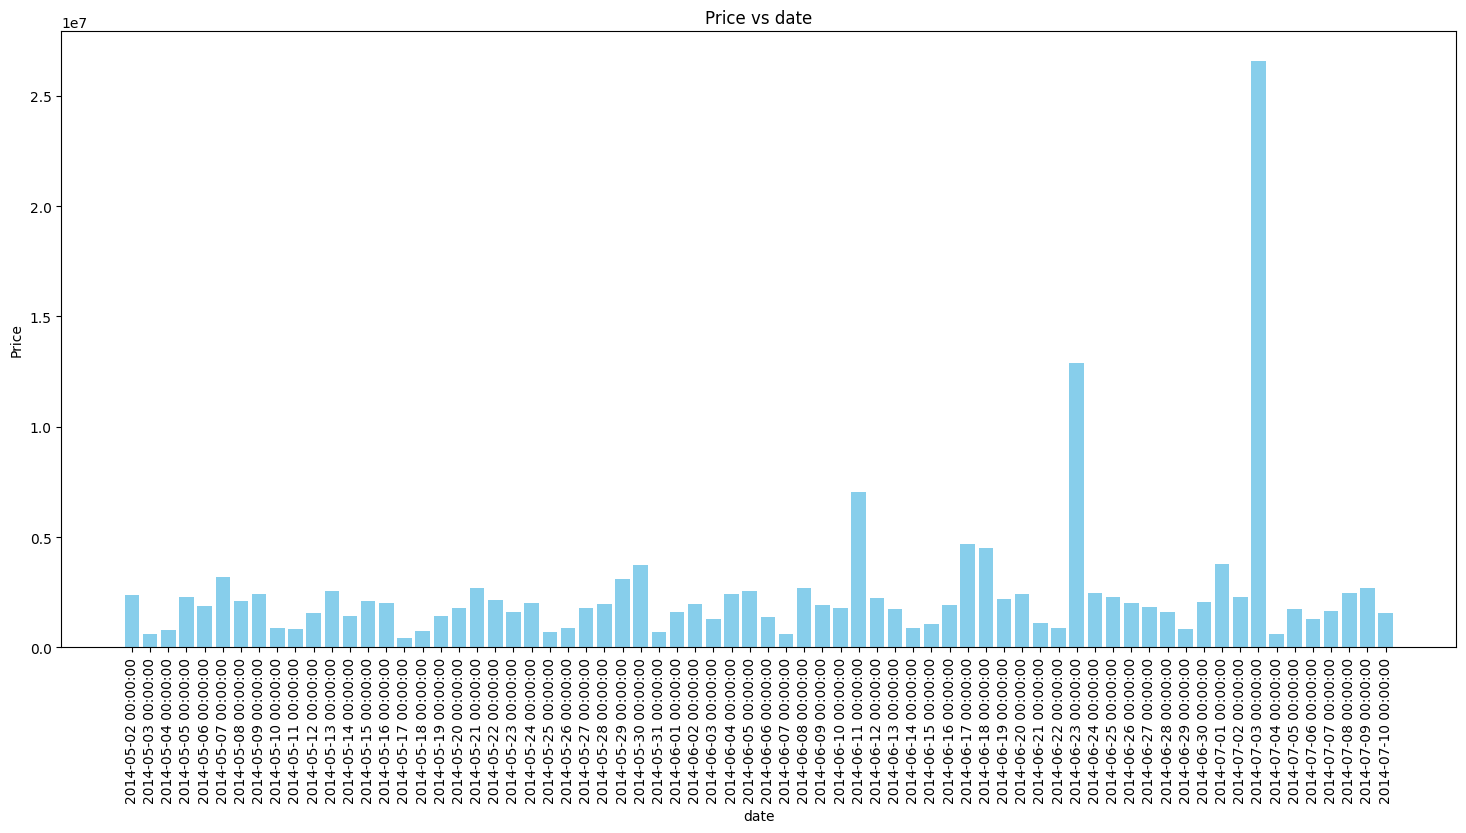

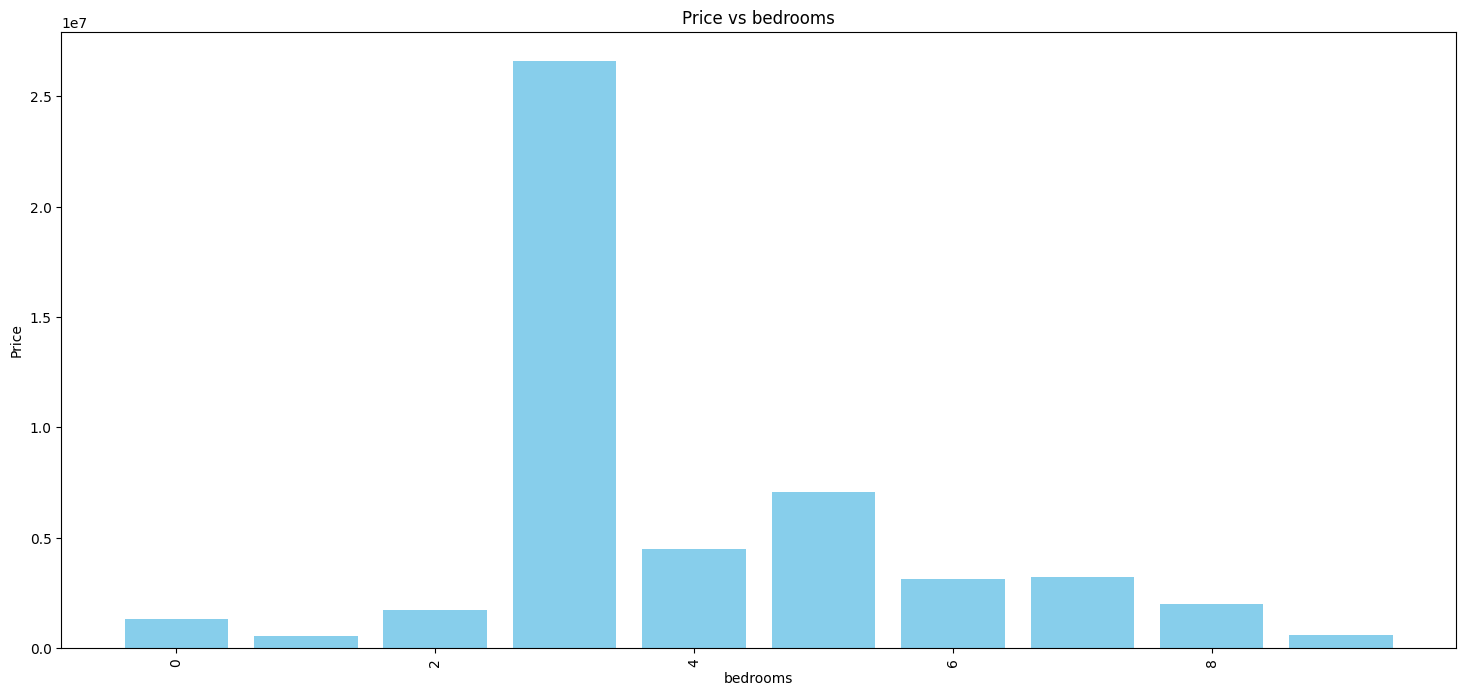

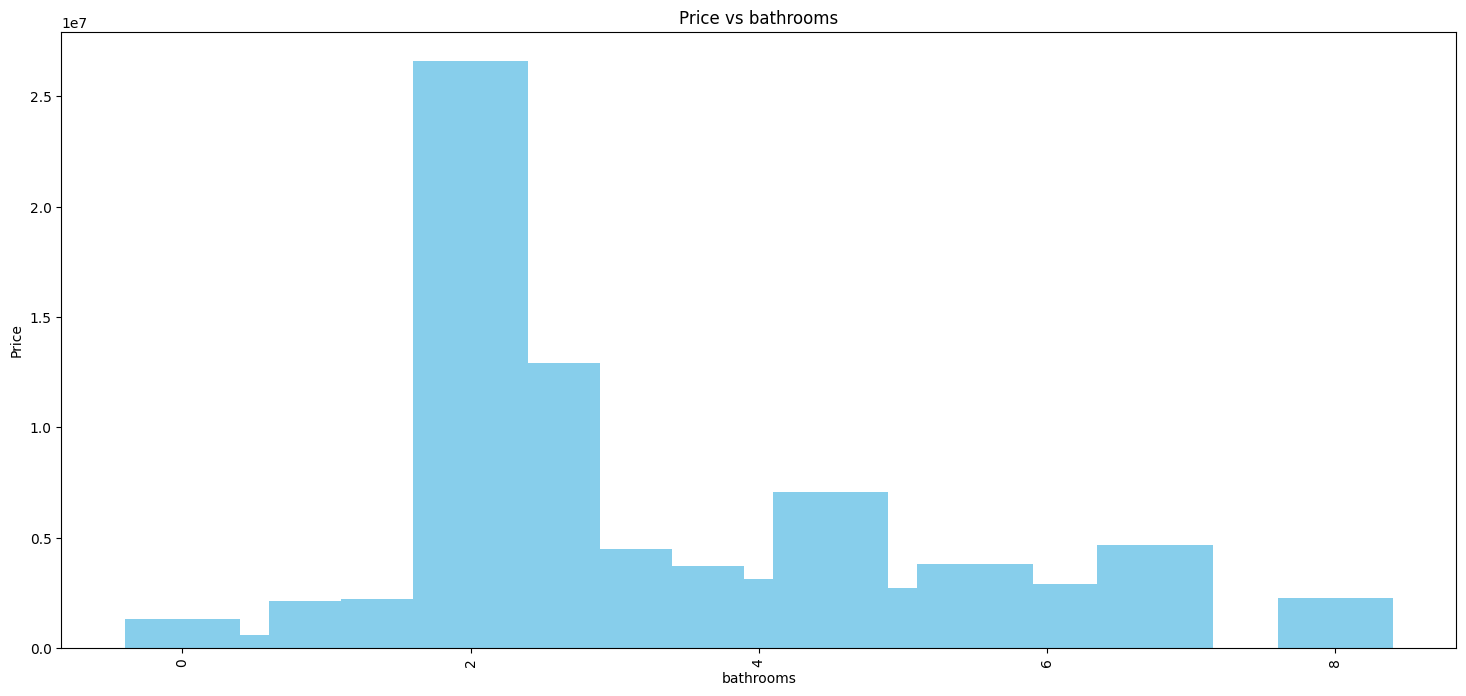

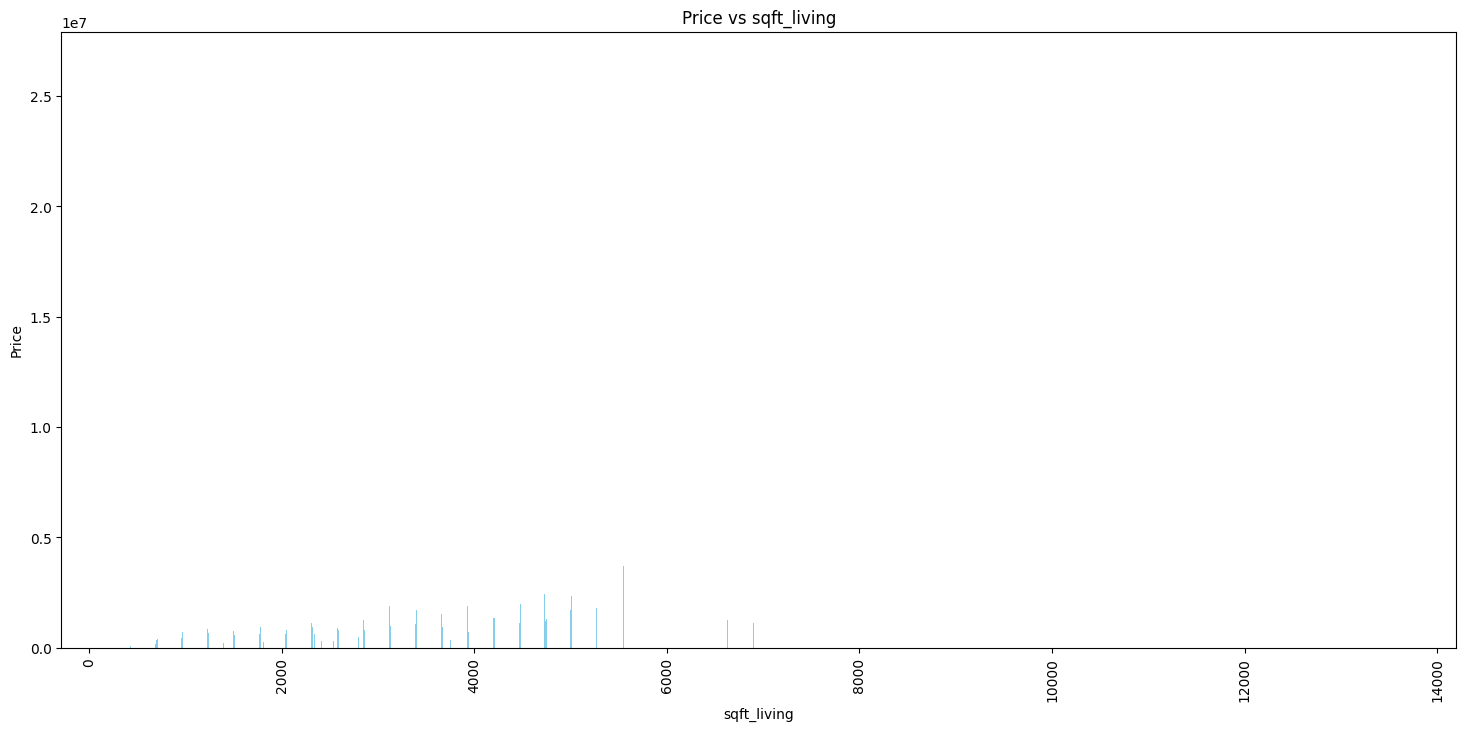

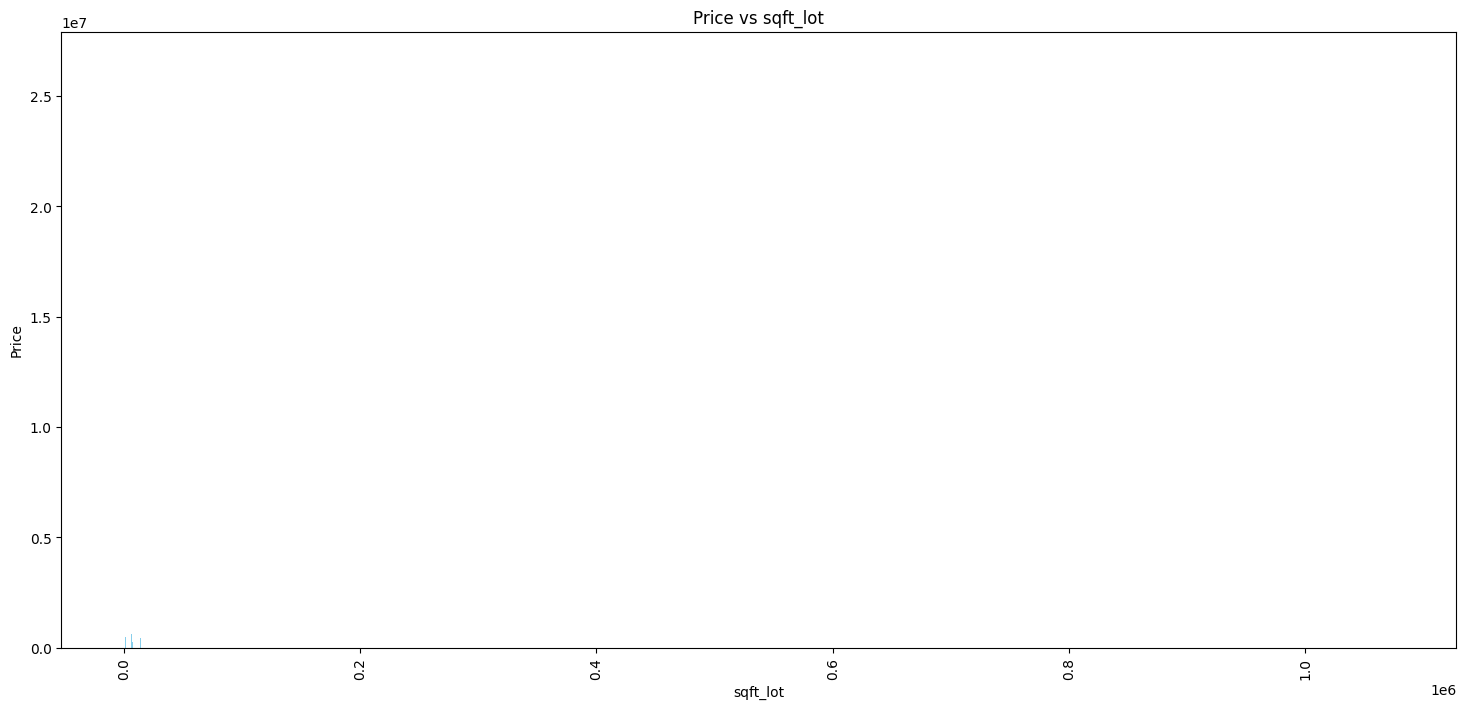

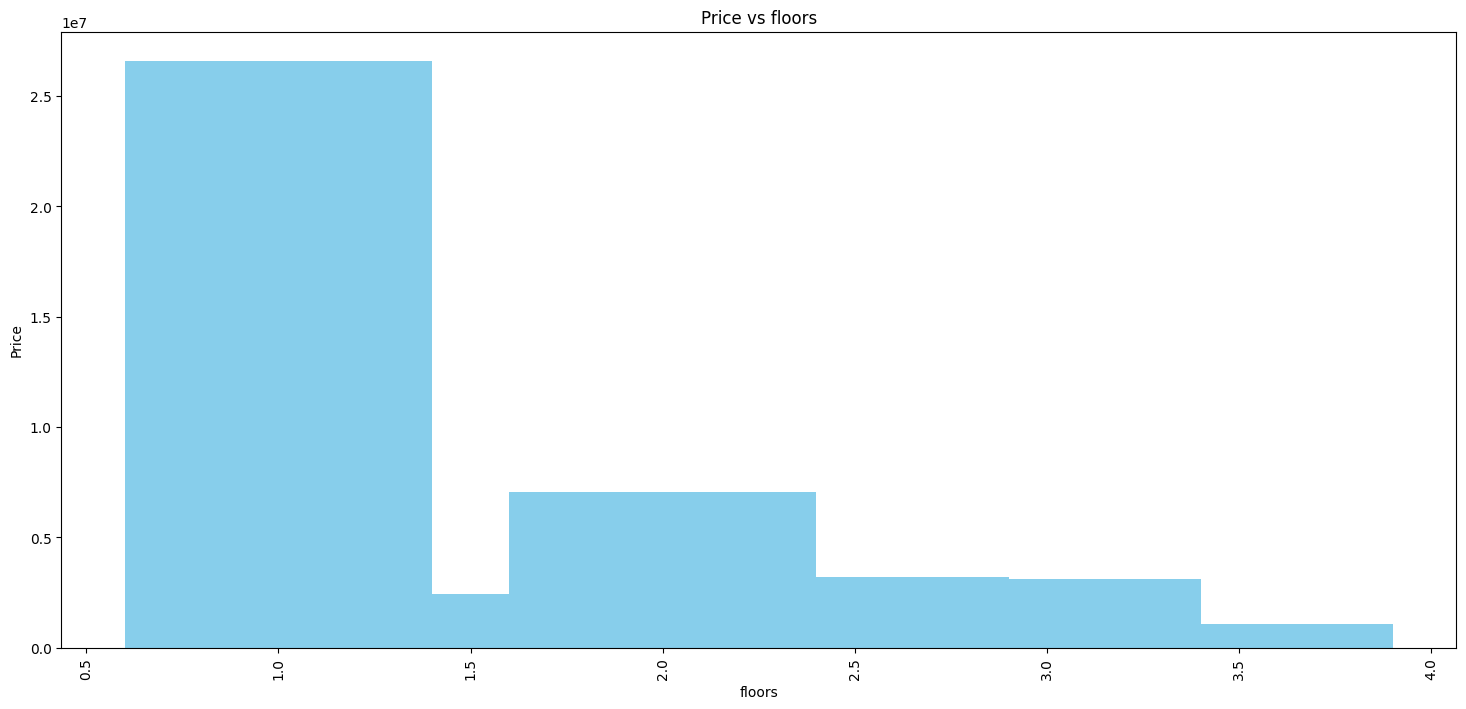

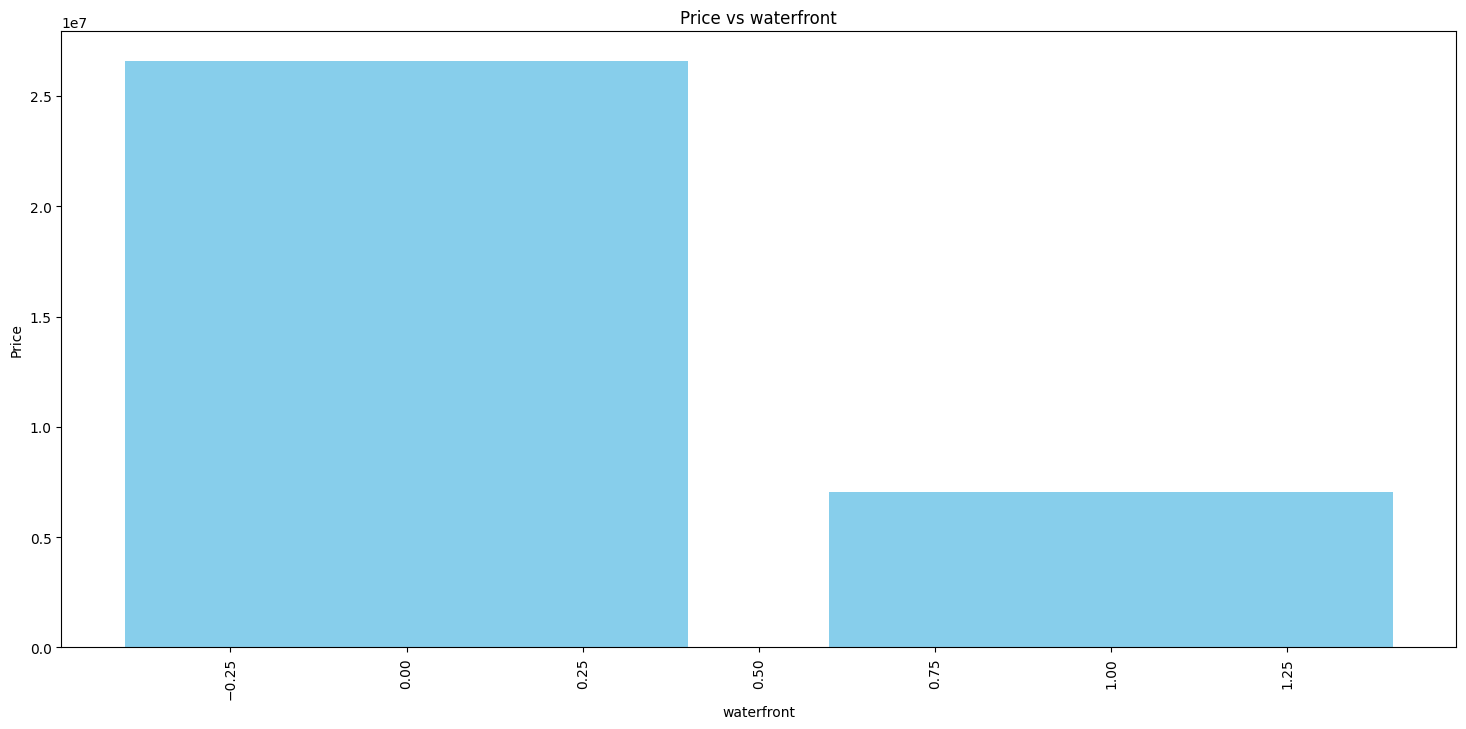

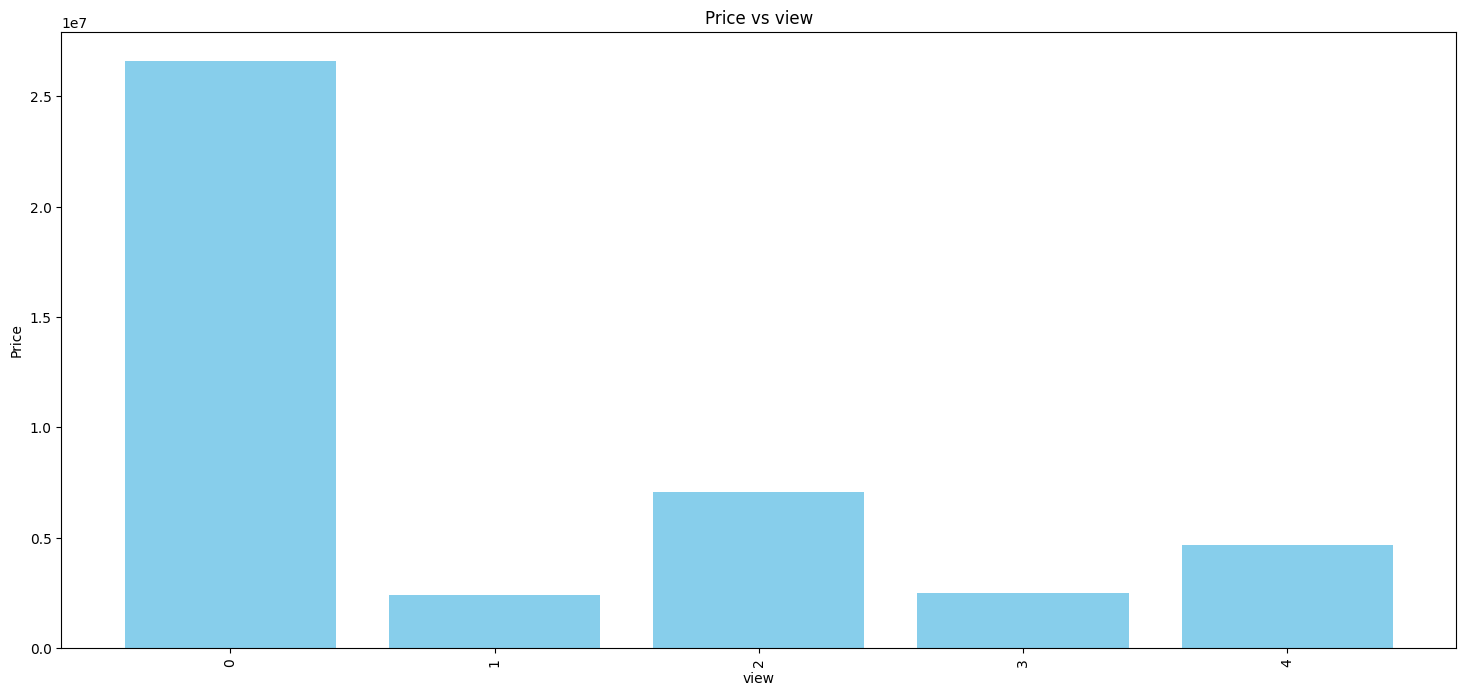

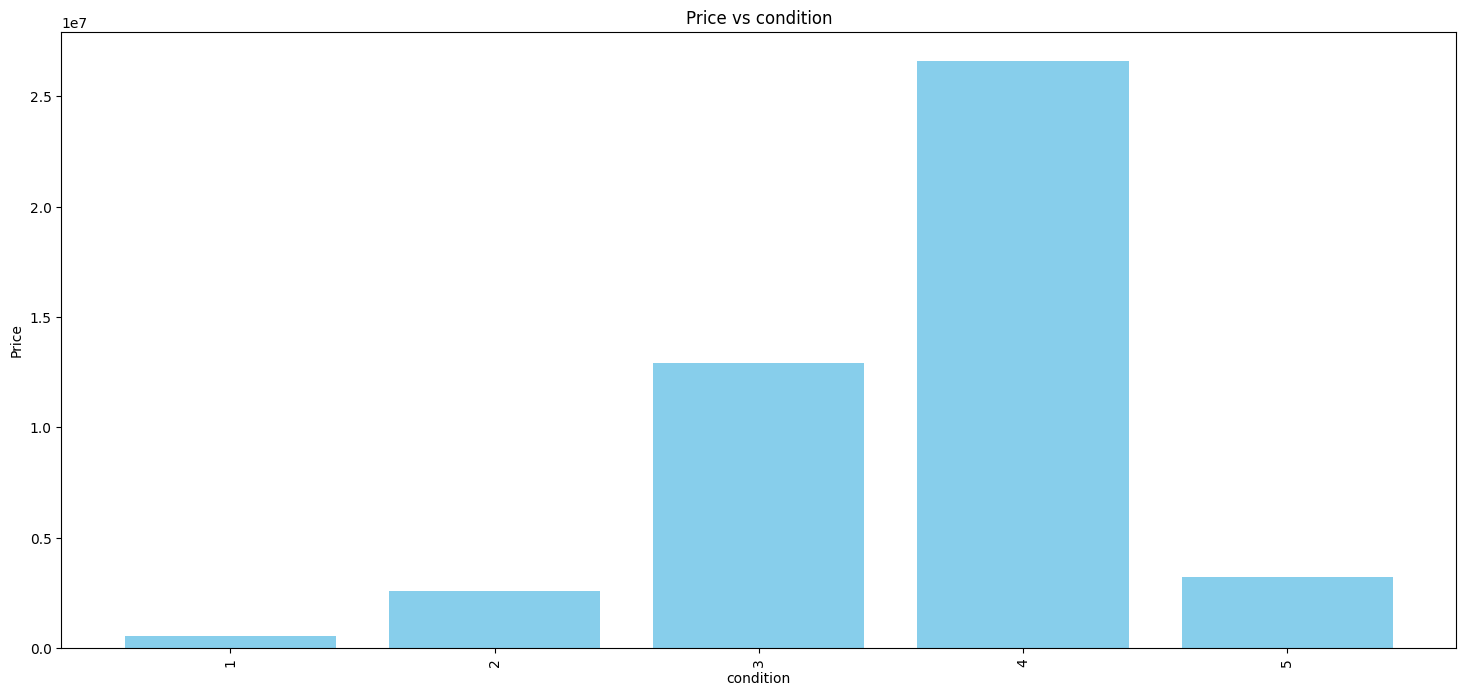

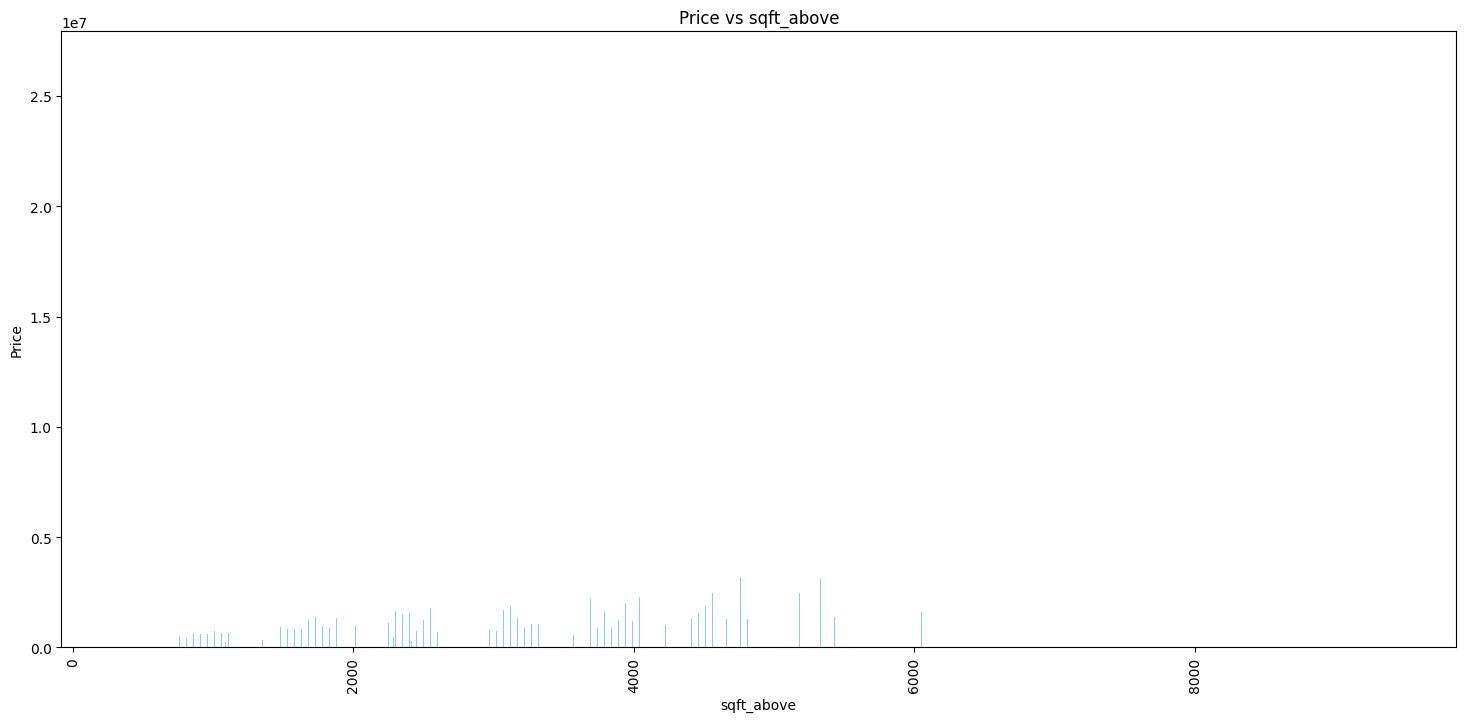

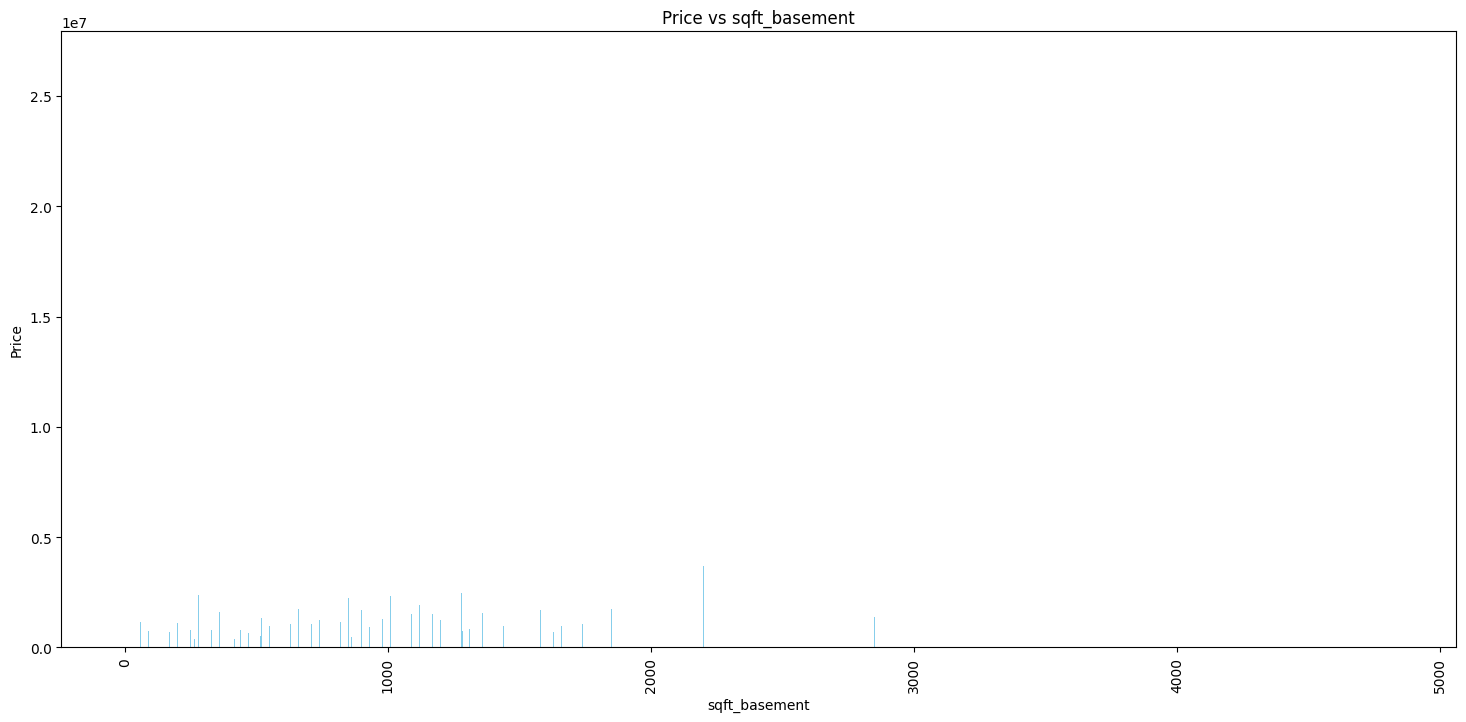

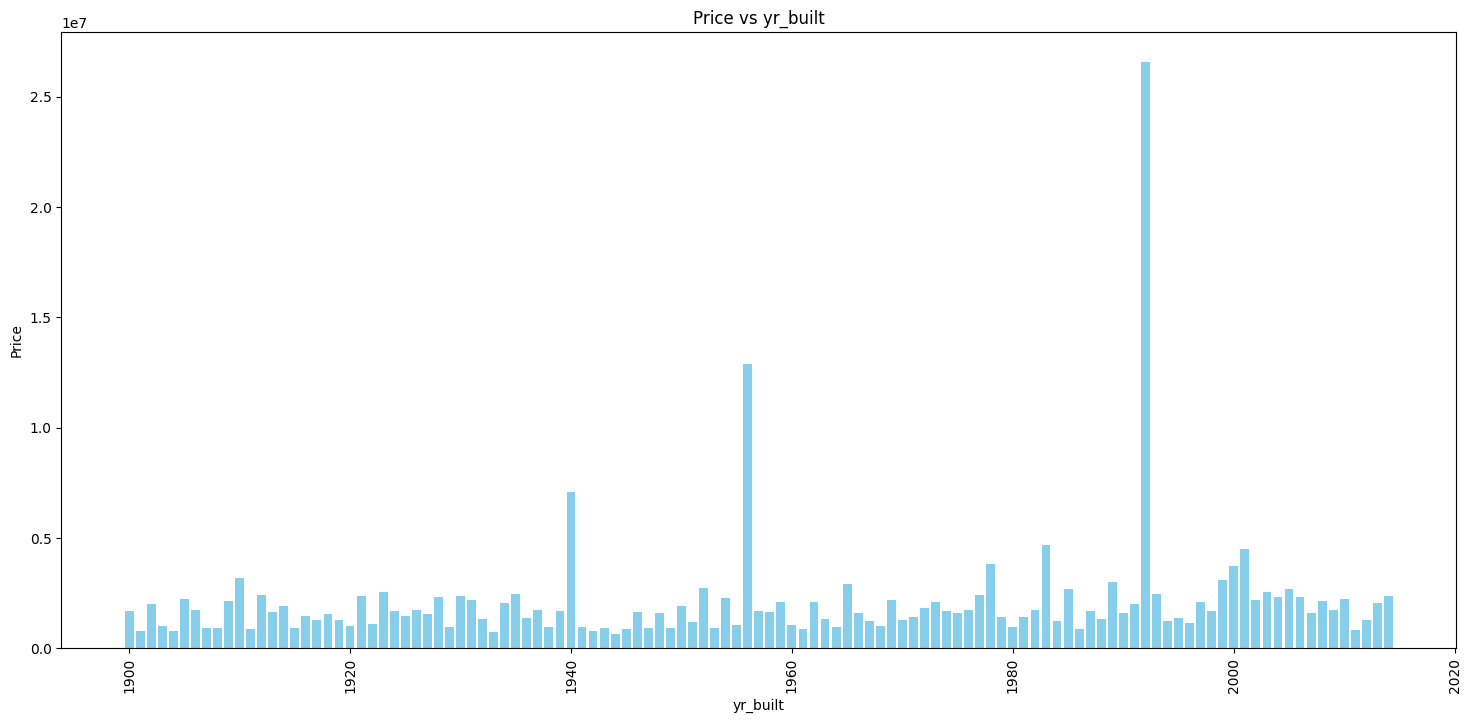

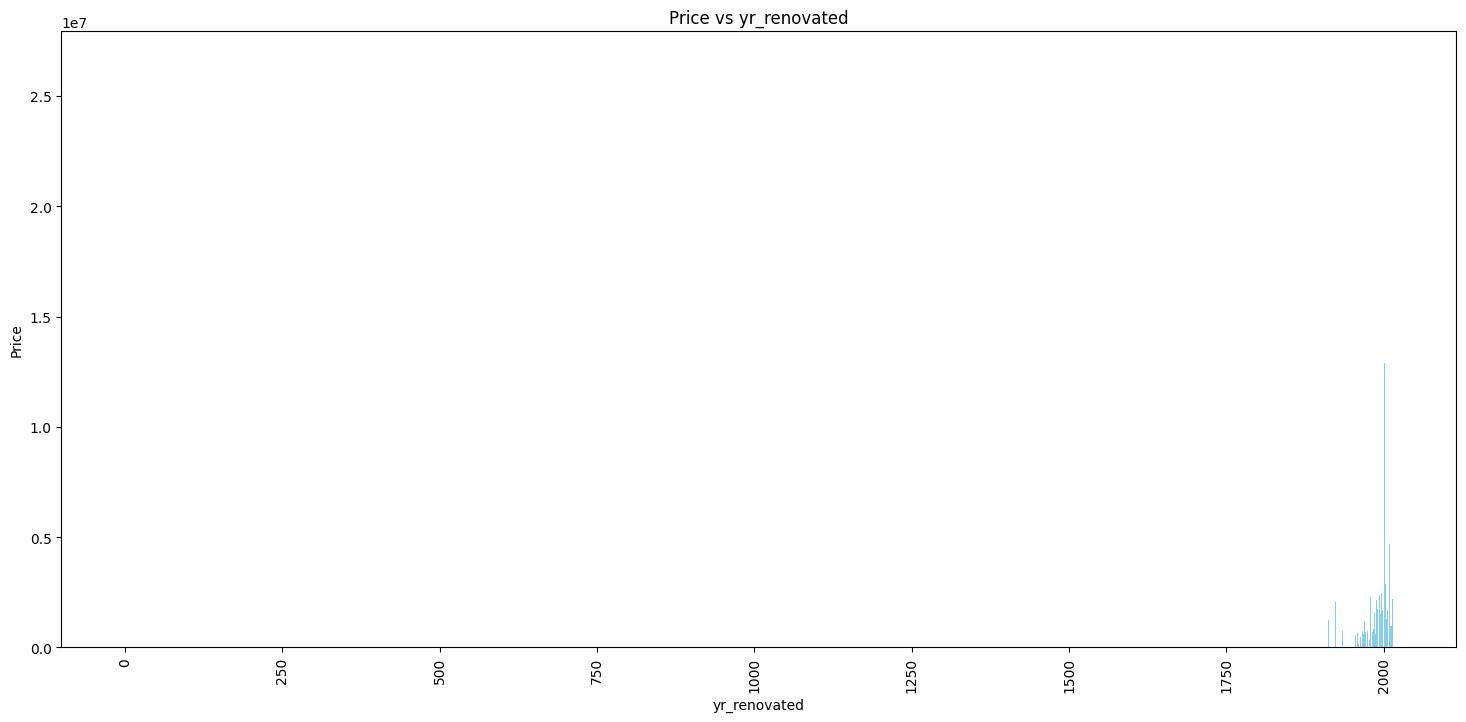

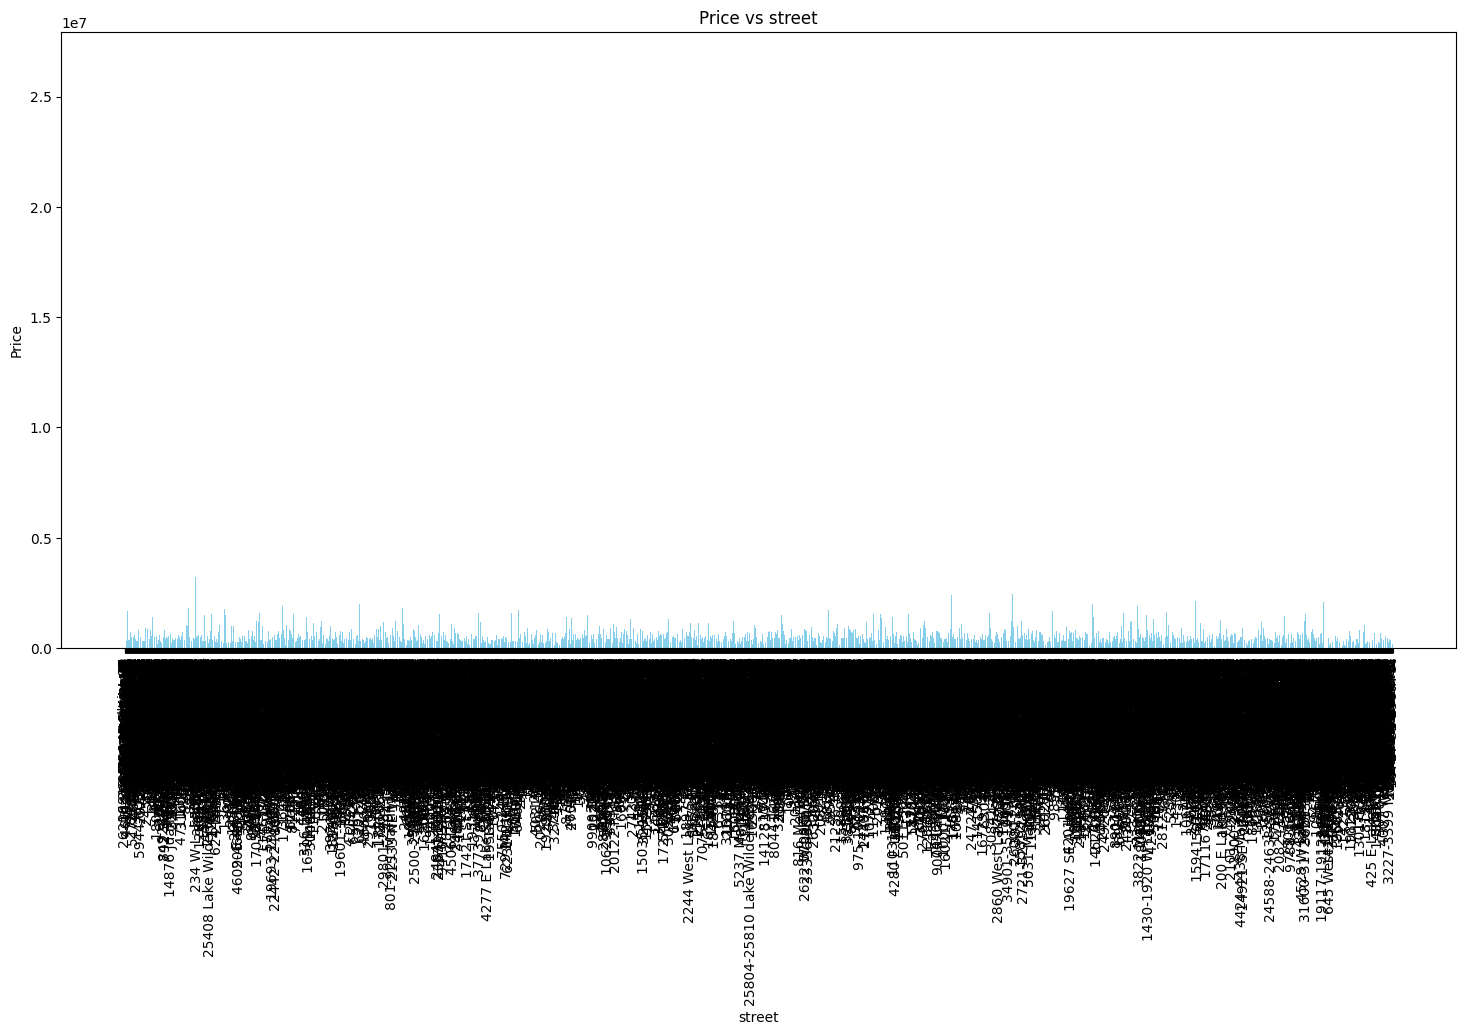

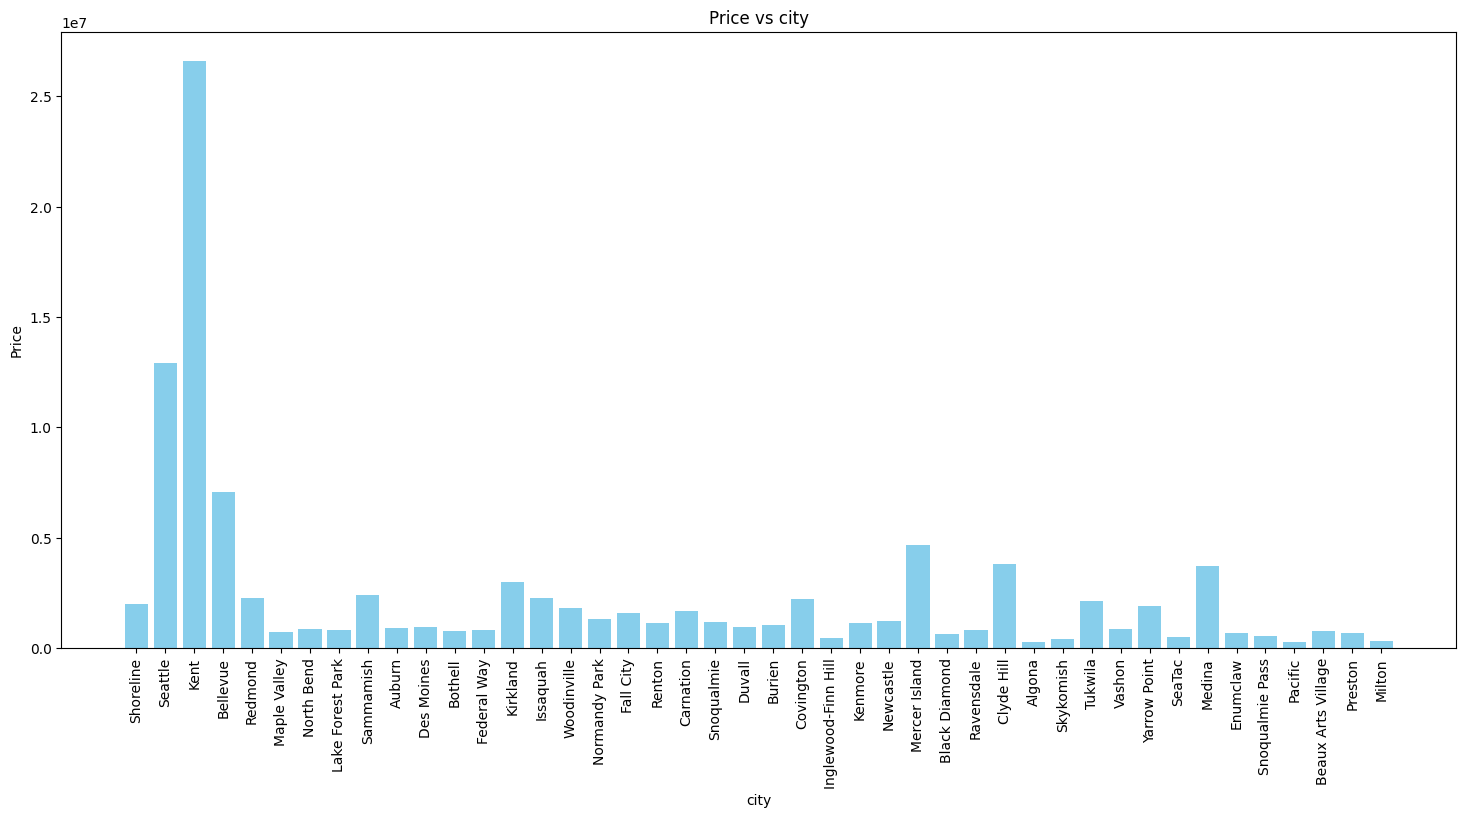

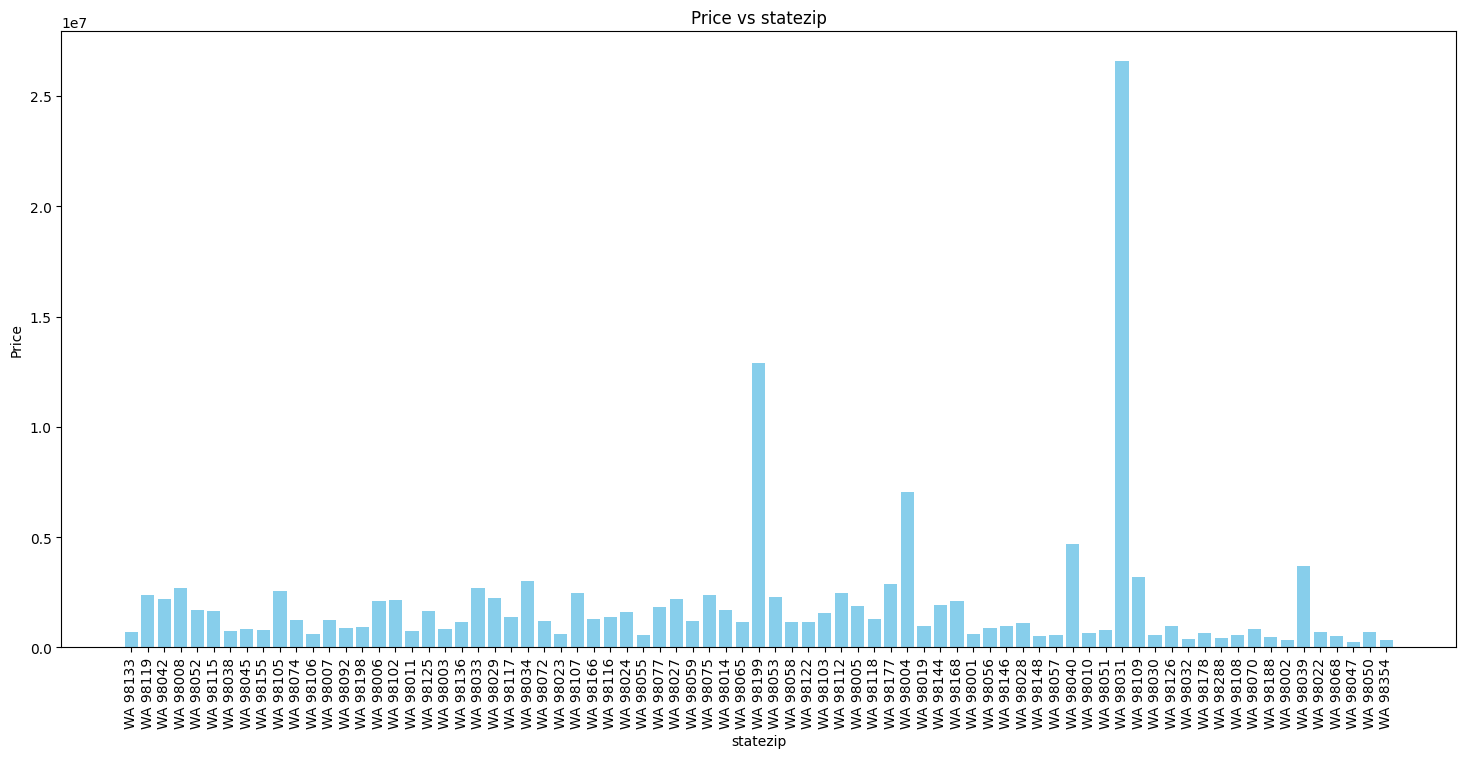

In [41]:
feature_names = df.drop(columns=['price', 'country']).columns.to_numpy()

for col in feature_names :
    plt.figure(figsize=(18, 8))
    plt.bar(df[col], df['price'], color='skyblue')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Price')
    plt.title(f'Price vs {col}')
    plt.show()

## Preprocess

**We cannot perform linear regression on non-numerical values hence use ordinal encoding to get values from string type data**

In [42]:
encoder = OrdinalEncoder()
df['city'] = encoder.fit_transform(df[['city']]).astype(int)
df['street'] = encoder.fit_transform(df[['street']]).astype(int)


**Transforming date into time in hours**

In [43]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].astype('int64') // 10**9//60//60


**Drop 'country' column and extract numeric part from 'statezip'**

In [44]:
df=df.drop(columns=['country'])
df["statezip"] = df["statezip"].str.extract(r'(\d+)$')
df["statezip"]=pd.to_numeric(df["statezip"])
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,388608,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522,36,98133
1,388608,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899,35,98119
2,388608,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291,18,98042
3,388608,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263,3,98008
4,388608,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352,31,98052
5,388608,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,3521,35,98115
6,388608,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2286,31,98052
7,388608,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,2038,21,98038
8,388608,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,3369,27,98045
9,388608,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,3846,35,98115


After preprocessing the data we can see that , the 'date' feature is integer showing us the true impact on the price .
The 'street' and 'city' has been ordinally encoded so that we can analysis their impact on the price . The 'statezip' has been converted to integer by removing the string .

**Seperating independent(input) and dependent features(output)**

In [45]:
X = df.drop(columns=['price'])
y = df['price']

**Seperating between training and testing data**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**Scaling the data to get better result**

In [47]:

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

Linear Regression has an assumption that all the Independent Variables(X), in the equation y = W0 X0 + W1 X1 + W2 X2 + ... WN XN, are independent of each other .

Vertically stacking ones matrix for matrix calculation

In [48]:
X_train=np.vstack((np.ones((X_train.shape[0],)),X_train.T)).T
X_test=np.vstack((np.ones((X_test.shape[0],)),X_test.T)).T

In [49]:
print(f'train data :\n {X_train}')
print(f'\ntest data :\n {X_test}')

train data :
 [[ 1.         -0.71104365  0.66178915 ... -0.7668315   0.11130576
  -0.64735527]
 [ 1.          0.96433743 -0.43375024 ... -0.16920802 -1.6409267
   1.25103051]
 [ 1.         -0.86335102  0.66178915 ... -1.67891331  0.77882289
   0.61196995]
 ...
 [ 1.          1.01510655 -0.43375024 ...  0.66120622  0.69538325
   2.04045826]
 [ 1.          1.57356691 -0.43375024 ... -1.65906886 -0.97340957
  -1.06086504]
 [ 1.         -1.62488787 -0.43375024 ... -1.38277294 -0.05557352
  -0.44060038]]

test data :
 [[ 1.         -1.675657   -0.43375024 ...  0.45054967  0.77882289
   2.24721314]
 [ 1.          0.65972269  0.66178915 ...  1.60687096  0.61194361
  -0.08347831]
 [ 1.          0.65972269  2.85286794 ... -0.75843577  1.36290037
  -0.04588651]
 ...
 [ 1.          1.62433604  0.66178915 ...  0.82454137  0.11130576
  -0.64735527]
 [ 1.          0.86279918 -0.43375024 ...  0.80088067  0.77882289
   0.53678635]
 [ 1.          1.01510655 -1.52928964 ... -0.92558716  0.86226253
   1.

In [50]:
print(f'train data :\n {y_train}')
print(f'\ntest data :\n {y_test}')

train data :
 [-0.29875844 -0.54220961  1.5792934  ... -0.48507311 -0.61209003
 -0.27391649]

test data :
 [-4.70266279e-02  2.69294273e-01  9.64869029e-01 -4.72652133e-01
  8.71199321e-02 -6.11767084e-01 -4.34561135e-01 -1.87797709e-01
 -5.73676086e-01  2.44203898e-01  4.57166729e-02 -6.49858083e-01
 -4.53704975e-02 -3.14822909e-01  2.19610362e-01  2.86113830e+00
 -2.81369075e-01 -2.09178353e-01 -4.01438527e-01 -4.17999831e-01
  2.85855577e-01  3.07385272e-01 -1.86141579e-01  1.36803843e-01
 -3.10351357e-01  5.39973247e-02 -2.94618118e-01  2.62669751e-01
 -4.17999831e-01  2.85855577e-01 -5.21784001e-01 -3.84877224e-01
 -2.32513229e-01  4.57166729e-02 -6.19318012e-02 -3.70800115e-01
  5.39973247e-02 -1.70408341e-01 -1.97550477e-01 -4.39529526e-01
 -1.74548666e-01 -5.25648305e-01  4.51468614e-01 -4.08063049e-01
 -3.43473964e-01  4.10065355e-01  1.45084495e-01 -2.88091938e-02
  7.16449473e-01  8.45373952e-03  1.74066777e-01  7.74414036e-01
  4.73728032e-02  5.40899654e-01 -2.05285420e-02

In [51]:
print(f'X_train data shape : {X_train.shape}')
print(f'y_train data shape : {y_train.shape}')
print(f'X_test data shape : {X_test.shape}')
print(f'X_test data shape : {y_test.shape}')

X_train data shape : (3680, 17)
y_train data shape : (3680,)
X_test data shape : (920, 17)
X_test data shape : (920,)


<a name="toc_15456_3"></a>
# 3 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

## 3.1 Single Prediction using vector dot product

In [52]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p

<a name="toc_15456_4"></a>
# 4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$




In [53]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

<a name="toc_15456_5"></a>
# 5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


<a name="toc_15456_5.1"></a>
## 5.1 Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples.
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
   

In [54]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

<a name="toc_15456_5.2"></a>
## 5.2 Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [55]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [56]:
w_init = np.zeros(X_train.shape[1])
b_init = 0.0
alpha = 1e-2
iterations = 4000

w_final, b_final, J_hist = gradient_descent(
    X_train, y_train,
    w_init, b_init,
    compute_cost, compute_gradient,
    alpha, iterations
)
print(f"\nFinal parameters:\nb = {b_final:.4f}\nw = {w_final}")


Iteration    0: Cost     0.49   
Iteration  400: Cost     0.40   
Iteration  800: Cost     0.40   
Iteration 1200: Cost     0.40   
Iteration 1600: Cost     0.40   
Iteration 2000: Cost     0.40   
Iteration 2400: Cost     0.40   
Iteration 2800: Cost     0.40   
Iteration 3200: Cost     0.40   
Iteration 3600: Cost     0.40   

Final parameters:
b = -0.0000
w = [-9.18033011e-16  2.33413417e-02 -8.97435736e-02  7.70886121e-02
  2.10875549e-01 -4.18287390e-02  3.94019482e-02  5.82080362e-02
  5.29228717e-02  3.97815729e-02  1.84355139e-01  8.94092241e-02
 -1.20038494e-01  1.32580314e-02  6.50419878e-04  4.18959952e-02
 -3.55586546e-02]


In [57]:
y_pred = np.dot(X_test, w_final) + b_final
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))
print("\nPredicted vs Actual Prices (first 10):")
for i in range(10):
    print(f"Prediction: {y_pred_rescaled[i][0]:,.2f}  |  Actual: {y_test_rescaled[i][0]:,.2f}")




Predicted vs Actual Prices (first 10):
Prediction: 391,886.57  |  Actual: 524,000.00
Prediction: 787,643.57  |  Actual: 715,000.00
Prediction: 1,568,129.04  |  Actual: 1,135,000.00
Prediction: 404,484.37  |  Actual: 267,000.00
Prediction: 617,382.66  |  Actual: 605,000.00
Prediction: 264,152.74  |  Actual: 183,000.00
Prediction: 648,618.55  |  Actual: 290,000.00
Prediction: 614,751.81  |  Actual: 439,000.00
Prediction: 647,886.34  |  Actual: 206,000.00
Prediction: 687,282.64  |  Actual: 699,850.00


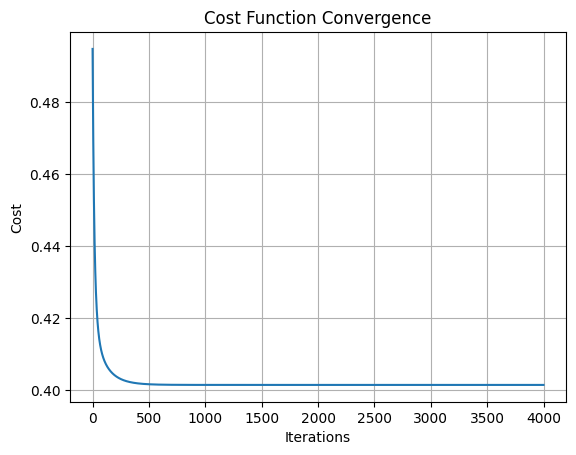

In [58]:
plt.plot(range(len(J_hist)), J_hist)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.grid(True)
plt.show()


In [59]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# R² Score
r2 = r2_score(y_test_rescaled, y_pred_rescaled)
print(f"R² Score: {r2:.4f}")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"RMSE: {rmse:,.2f}")

R² Score: 0.4639
RMSE: 264,828.85


In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)
y_pred_sklearn_rescaled = scaler_y.inverse_transform(y_pred_sklearn.reshape(-1, 1))

print("\nSklearn LinearRegression Predictions (first 10):")
for i in range(10):
    print(f"Prediction: {y_pred_sklearn_rescaled[i][0]:,.2f}  |  Actual: {y_test_rescaled[i][0]:,.2f}")

r2 = r2_score(y_test_rescaled, y_pred_sklearn_rescaled )
print(f"R² Score: {r2:.4f}")



Sklearn LinearRegression Predictions (first 10):
Prediction: 391,886.56  |  Actual: 524,000.00
Prediction: 787,643.70  |  Actual: 715,000.00
Prediction: 1,568,129.47  |  Actual: 1,135,000.00
Prediction: 404,484.65  |  Actual: 267,000.00
Prediction: 617,382.71  |  Actual: 605,000.00
Prediction: 264,152.63  |  Actual: 183,000.00
Prediction: 648,618.35  |  Actual: 290,000.00
Prediction: 614,751.93  |  Actual: 439,000.00
Prediction: 647,886.43  |  Actual: 206,000.00
Prediction: 687,282.35  |  Actual: 699,850.00
R² Score: 0.4639
